<a href="https://colab.research.google.com/github/Abiola97/ajaoabiola0812/blob/main/Data_Science_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Campaign Analysis: Predicting Customer Purchase Using Decision Tree Classification**


## **Objective:** To build a Decision Tree Classifier that predicts whether a customer will purchase a product or service based on demographic and behavioral data, using the Bank Marketing dataset from the UCI Machine Learning Repository.


**IMPORTING NECESSARY LIBARIES**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

**LOADING DATASET**

In [ ]:
# Load dataset
file_path = "/content/Bank Marketing Dataset combined.xlsx"
df_full = pd.read_excel(file_path, sheet_name="bank-full")
df_test = pd.read_excel(file_path, sheet_name="bank")

**SPLITTING THE BANK-FULL DATASET IN THE COMBINED DATASET**

In [ ]:
# Split training and validation
train_df, val_df = train_test_split(df_full, test_size=0.2, stratify=df_full['y'], random_state=42)

**PREROCESSING THE DATASET FOR LABEL ENCODING OF CATEGORICAL VARIBLES**

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()

def encode(df):
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        if col != 'y':
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    return df_encoded

train_df = encode(train_df)
val_df = encode(val_df)
df_test = encode(df_test)

**EXTRACTING FEATURES**

In [ ]:
# Separate features and target
X_train = train_df.drop(columns=['y'])
y_train = train_df['y']
X_val = val_df.drop(columns=['y'])
y_val = val_df['y']
X_test = df_test.drop(columns=['y'])
y_test = df_test['y']

**TRAINING THE DECISION TREE MODEL**

In [ ]:
# Train basic decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**EVALUATING MODELS PERFORMANCE WITH SPLIT DATA (VALIDATION) AND NEW TEST DATA (BANK)**

In [ ]:
# Predict and evaluate
for name, X, y in [("Validation", X_val, y_val), ("Test", X_test, y_test)]:
    y_pred = clf.predict(X)
    print(f"\n{name} Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"{name} Report:\n{classification_report(y, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y, y_pred)}")


Validation Accuracy: 0.8769
Validation Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7985
         yes       0.47      0.48      0.48      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.88      0.88      9043

Validation Confusion Matrix:
[[7423  562]
 [ 551  507]]

Test Accuracy: 0.9757
Test Report:
              precision    recall  f1-score   support

          no       0.99      0.98      0.99      4000
         yes       0.88      0.92      0.90       521

    accuracy                           0.98      4521
   macro avg       0.93      0.95      0.94      4521
weighted avg       0.98      0.98      0.98      4521

Test Confusion Matrix:
[[3933   67]
 [  43  478]]


**DERIVING THE MOST IMPORTANT FEATURES**

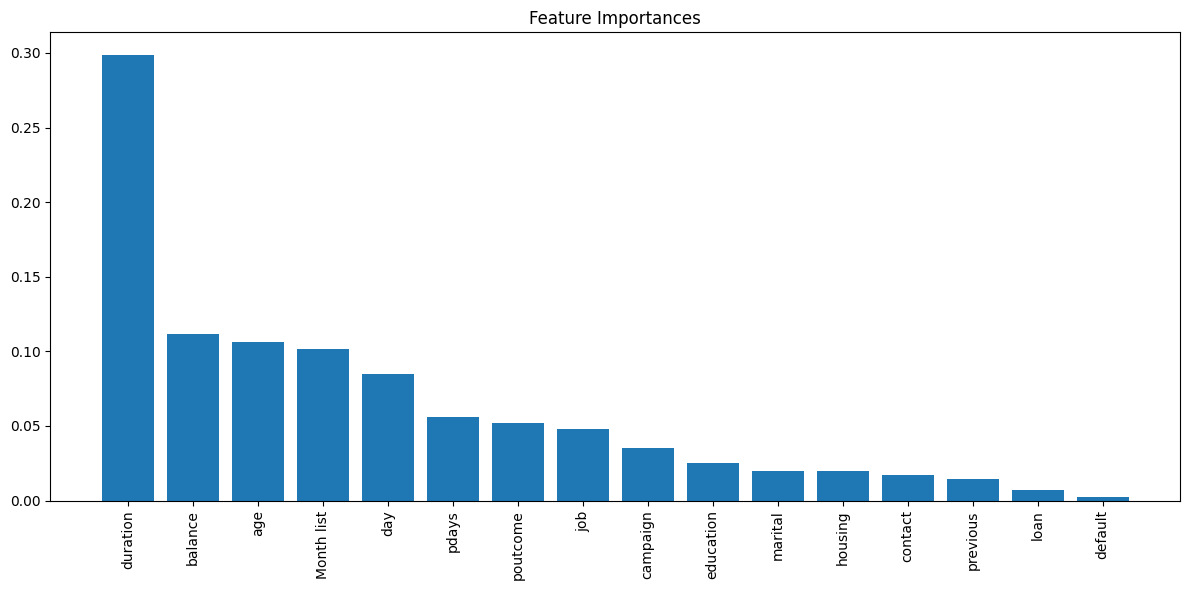

In [ ]:
# Feature importance
import numpy as np
importances = clf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

**VISUALIZATION OF DECISION TREE MODEL**

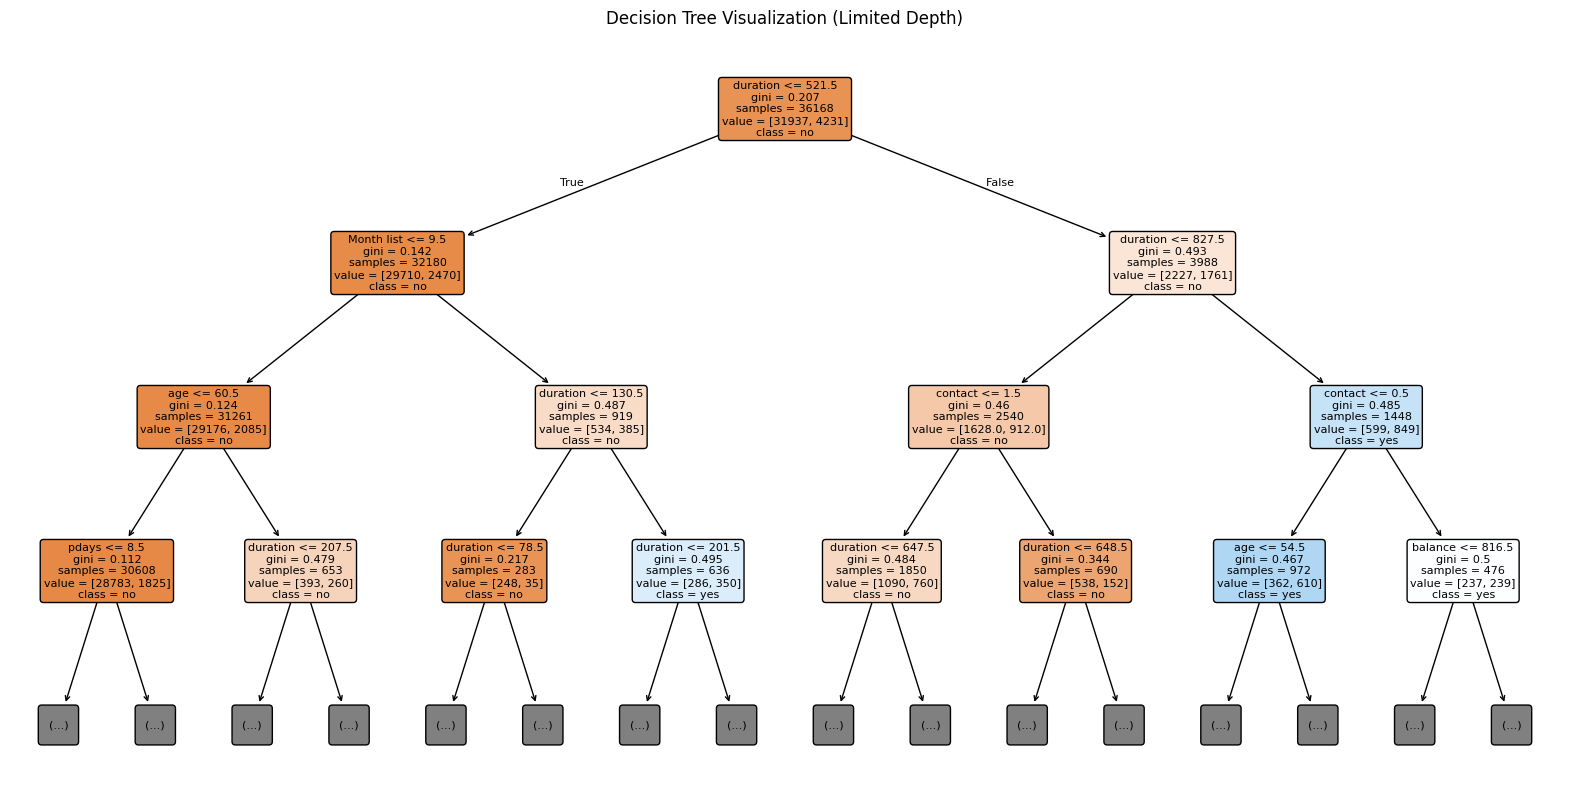

In [ ]:
# Identify top features for visualization (adjust n_features as needed)
n_features_to_plot = 5  # You can change this number
top_feature_indices = indices[:n_features_to_plot]
top_features = features[top_feature_indices]

# Filter the tree to focus on these features (conceptual, not a direct plotting option)
# Instead of filtering the tree structure, we'll adjust the plotting
# parameters to make the plot of the *full* tree more readable for relevant features.

# Reduce the depth and increase figure size for better visibility
plt.figure(figsize=(20, 10)) # Adjust figure size as needed
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=[str(c) for c in clf.classes_], # Ensure class names are strings
          filled=True,
          rounded=True,
          fontsize=8, # Adjust font size
          max_depth=3) # Limit the depth of the tree to plot for clarity
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

**SAVING THE MODEL FOR FUTURE USE VIA JOBLIB**

In [ ]:
# Save model
joblib.dump(clf, "basic_decision_tree_model.pkl")
print("Basic model saved successfully.")


Basic model saved successfully.


**LOADING PRESAVED MODEL TO MAKE PREDICTION ON NEW DATA**

In [ ]:
# Load the saved model
loaded_model = joblib.load("/content/basic_decision_tree_model.pkl")

# Make predictions on new data
new_predictions = loaded_model.predict(X_val)

print(new_predictions[:10])  # Show first 10 predictions

# Get prediction probabilities
y_probs = loaded_model.predict_proba(X_test)[:, 1]  # Get probability of "Yes

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


**FINAL EVALUATION OF MODEL'S PERFORMANCE ON TEST DATA ON SHEET NAMED BANK**

In [ ]:
import seaborn as sns

# Assuming y_pred is already calculated from clf.predict(X_test)
y_test_pred = clf.predict(X_test)

# Evaluate the final model
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

def plot_confusion_matrix_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


Test Accuracy: 0.9757

Test Classification Report:
               precision    recall  f1-score   support

          no       0.99      0.98      0.99      4000
         yes       0.88      0.92      0.90       521

    accuracy                           0.98      4521
   macro avg       0.93      0.95      0.94      4521
weighted avg       0.98      0.98      0.98      4521


Test Confusion Matrix:
 [[3933   67]
 [  43  478]]


**VISUALIZATION AND INTERPREATION OF MODEL'S PERFORMANCE**

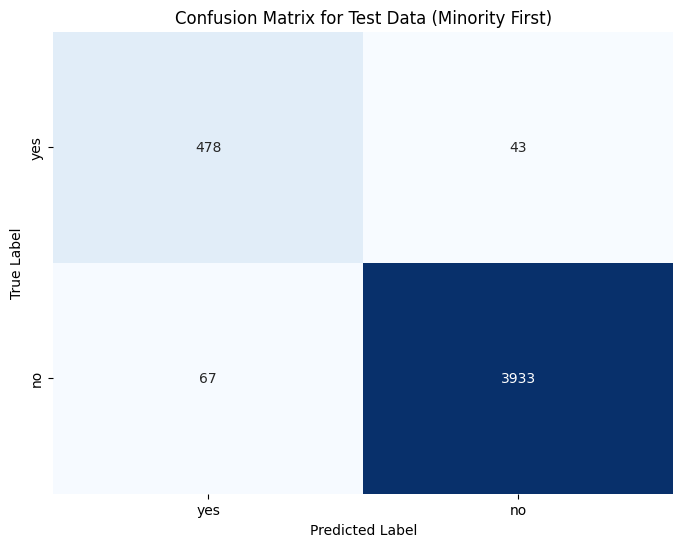


Detected Actual Buyers (True Positives): 478
Missed Buyers (False Negatives): 43
Incorrectly Predicted Buyers (False Positives): 67


In [ ]:
# Generate the confusion matrix with labels in the desired order
cm = confusion_matrix(y_test, y_test_pred, labels=['yes', 'no'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title("Confusion Matrix for Test Data (Minority First)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nDetected Actual Buyers (True Positives):", conf_matrix[1, 1])
print("Missed Buyers (False Negatives):", conf_matrix[1, 0])
print("Incorrectly Predicted Buyers (False Positives):", conf_matrix[0, 1])